In [69]:
import os
from tqdm import tqdm_notebook as tqdm
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D, art3d
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import torch
import torch.nn as nn

import numpy as np

from plyfile import PlyData, PlyElement

In [70]:
def read_mesh(filename):
    
    plydata = PlyData.read(filename)
    tri_data = plydata['face'].data['vertex_indices']
    faces = np.vstack(tri_data)
    vertices = np.vstack((plydata['vertex'].data['x'], plydata['vertex'].data['y'], plydata['vertex'].data['z'])).T
    
    return vertices, faces

def sphere_surface(npoints,r):
    theta = 2*np.pi*np.random.rand(npoints)
    phi = np.arccos(2*np.random.rand(npoints)-1)
    x = r*np.cos(theta) * np.sin(phi)
    y = r*np.sin(theta) * np.sin(phi)
    z = r*np.cos(phi)
    return np.stack((x,y,z)).T

def torus_surface(npoints, R, r):
    theta = 2*np.pi*np.random.rand(npoints)
    phi = 2*np.pi*np.random.rand(npoints)
    x = (R + r*np.cos(theta)) * np.cos(phi)
    y = (R + r*np.cos(theta)) * np.sin(phi)
    z = r*np.sin(theta)
    return np.stack((x,y,z)).T


def plot_model_3d(vertices, faces, points, loss, elev,azim, filename):
    """
    Visualize mesh object. 
    """

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    
    pc = art3d.Poly3DCollection(vertices[faces],linewidths=0.1,edgecolor = 'k')
    ax.add_collection(pc)
    
    ax.scatter(points[:,0], points[:,1], points[:,2], c='red', alpha = 0.2)
    
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_zlim(-1.0, 1.0)
    
    ax.set_title('Objective: '+str(loss), fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax.view_init(elev=elev, azim = azim)
    #print("storing ", filename)
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    
def plot_interp(vertices, faces, elev,azim, filename):
    """
    Visualize mesh object. 
    """

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    
    pc = art3d.Poly3DCollection(vertices[faces],linewidths=0.1,edgecolor = 'k')
    ax.add_collection(pc)
    
    
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_zlim(-1.0, 1.0)
    
    ax.view_init(elev=elev, azim = azim)
    #print("storing ", filename)
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

In [82]:
folder_name = "../Expirements/SavedTransforms/0-99_usual"

if  not os.path.exists(folder_name):
    raise
else:
    if not os.path.exists(folder_name + '/frames'):
        os.makedirs(folder_name + '/frames')
    if not os.path.exists(folder_name + '/report'):
        os.makedirs(folder_name + '/report')

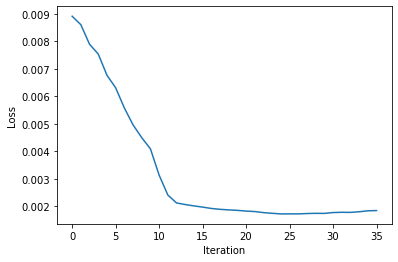

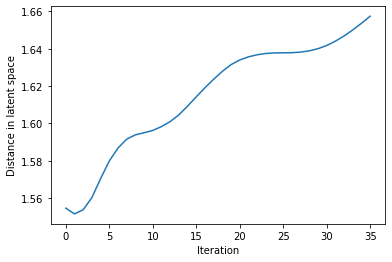

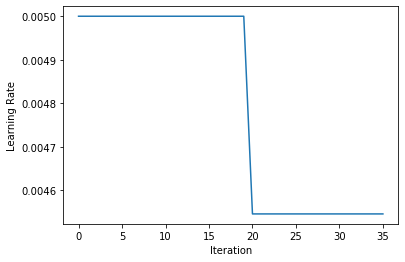

In [83]:
losses = np.load(folder_name +"/loss_plot.npy")
plt.figure()
#plt.yscale("log")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(losses)
plt.savefig(folder_name + '/report/loss_plot.png')
plt.show()

latent = np.load(folder_name +"/latent_dist.npy")
plt.figure()
plt.xlabel('Iteration')
plt.ylabel('Distance in latent space')
plt.plot(latent)
plt.savefig(folder_name + '/report/latent_dist.png')
plt.show()

lr = np.load(folder_name +"/lr_plot.npy")
plt.figure()
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.plot(lr)
plt.savefig(folder_name + '/report/lr_plot.png')
plt.show()

In [ ]:
pts = np.load(folder_name +"/target_verts.npy")
pts = pts[torch.randperm(pts.shape[0])]
pts = pts[0:5000, :]
pts = pts[:,[0,2,1]]

losses = np.load(folder_name +"/loss_plot.npy", allow_pickle=True)

number_of_frames = len([name for name in os.listdir(folder_name + "/meshes") if name[-4:]=='.ply'])
losses = [0]* number_of_frames
for i in tqdm(range(number_of_frames)):
    vertices, faces = read_mesh(folder_name +'/meshes/'+ str(i).zfill(5) +'.ply')
    plot_model_3d(vertices[:,[0,2,1]], faces,pts, losses[i], 60,30+i, folder_name + '/frames/' +str(i).zfill(5)+'.png')